In [564]:
import os

new_directory = "C:\\Users\\amans\\OneDrive - IIT Kanpur\\Job ready\\Internships\\Flight_fare_prediction\\archive"
os.chdir(new_directory)

# Now, you can use os.walk() to traverse through the files and directories in the new location
for dirname, _, filenames in os.walk(
    "."
):  # Note the dot (.), which represents the current directory
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\Data_Train.xlsx
.\fare_pred.ipynb
.\flight_fare_prediction.ipynb
.\imagesmatplotlib_plot_generation.gv
.\low_level_document.docx
.\main.py
.\Sample_submission.xlsx
.\Test_set.xlsx
.\.ipynb_checkpoints\flight_fare_prediction-checkpoint.ipynb
.\images\flight_fare_pred\3_box_plot.png
.\images\flight_fare_pred\3_error_metric.png
.\images\flight_fare_pred\3_stad.png
.\images\flight_fare_pred\Airline_vs_avg_price.png
.\images\flight_fare_pred\Airline_wise_market.png
.\images\flight_fare_pred\correlation_matrix.png
.\images\flight_fare_pred\describe.png
.\images\flight_fare_pred\extra_bes_features.png
.\images\flight_fare_pred\extra_feat.png
.\images\flight_fare_pred\feature_engg.png
.\images\flight_fare_pred\final_model_XGBR.png
.\images\flight_fare_pred\histogram_price.png
.\images\flight_fare_pred\multi_colinearity.png
.\images\flight_fare_pred\multi_col_2.png
.\images\flight_fare_pred\multi_col_3.png
.\images\flight_fare_pred\No_scaling.png
.\images\flight_fare_pred\no_scaling_box_plot.

In [565]:
# View Settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']

#Importing Libraries
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import lightgbm as ltb

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


import pickle

# Dataset view settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)





In [566]:
df = pd.read_excel(
    "C:\\Users\\amans\\OneDrive - IIT Kanpur\\Job ready\\Internships\\Flight_fare_prediction\\archive\\Data_Train.xlsx"
)

Exploratory Data Analysis

df.head()

In [567]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


df.head()

In [568]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [569]:
# Dataset Size
df.shape

(10683, 11)

In [570]:
df.dtypes.value_counts()

object    10
int64      1
dtype: int64

In [571]:
# Unique values in each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [572]:
# Duplicate fields
df.duplicated().sum()

220

In [573]:
# Statistical description of the entire Dataset including categorical columns
df.describe(include=["O"]).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [574]:
# Statistical description of only numeric columns in the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [575]:
# Null values in the Dataset
df.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [576]:
# Listing categorical and numerical columns:
v_c = list(df.select_dtypes(include=["object"]).columns)
v_n = list(df.select_dtypes(include=["float64", "int64"]).columns)
print("Categorical Variables:", v_c)
print("Numerical Variables:", v_n)

Categorical Variables: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
Numerical Variables: ['Price']


In [577]:
# Count of categorical column values
colucat = df.select_dtypes(include="object").columns
for i in range(0, len(colucat)):
    print(df[colucat[i]].value_counts())
    print("_____________________________\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
_____________________________

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03

In [578]:
# Count the values of numeric columns
colunum = df.select_dtypes(include=["float64", "int64"]).columns
for i in range(0, len(colunum)):
    print(df[colunum[i]].value_counts())
    print("_____________________________\n")

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
9663      84
14781     84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
8016      60
6442      60
3100      58
14571     57
13941     57
11087     57
13014     57
2754      56
4423      53
4544      51
4668      49
13377     49
14388     49
7832      47
3543      45
8372      43
3419      43
13587     42
13067     42
7480      41
2227      40
7064      40
13376     39
8040      39
9646      38
4049      38
6961      37
15554     36
1965      36
13292     36
16079     36
4995      35
2017      35
13817     35
4878      34
13029     33
5228      32
4148      32
3383      31
14871     31
6093      30
12692     30
11467     29
4409      29
5403      29
4030      29
4591      29
3625      29
5192      28
8452      28
6795      27
6144      27
8610      27
13727     26
7408      26
8529      26
6216      25

In [579]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


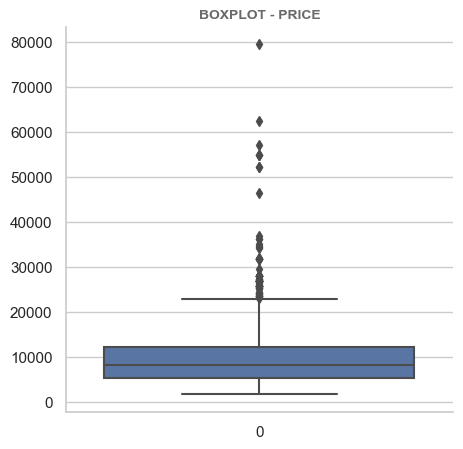

In [580]:
# Boxplot

# Plot
plt.figure(figsize=(5, 5))
sns.boxplot(df["Price"])
sns.despine()
plt.title("BOXPLOT - PRICE", fontsize=10, color="dimgrey", fontweight="bold")
plt.show()

Text(0, 0.5, 'COUNT')

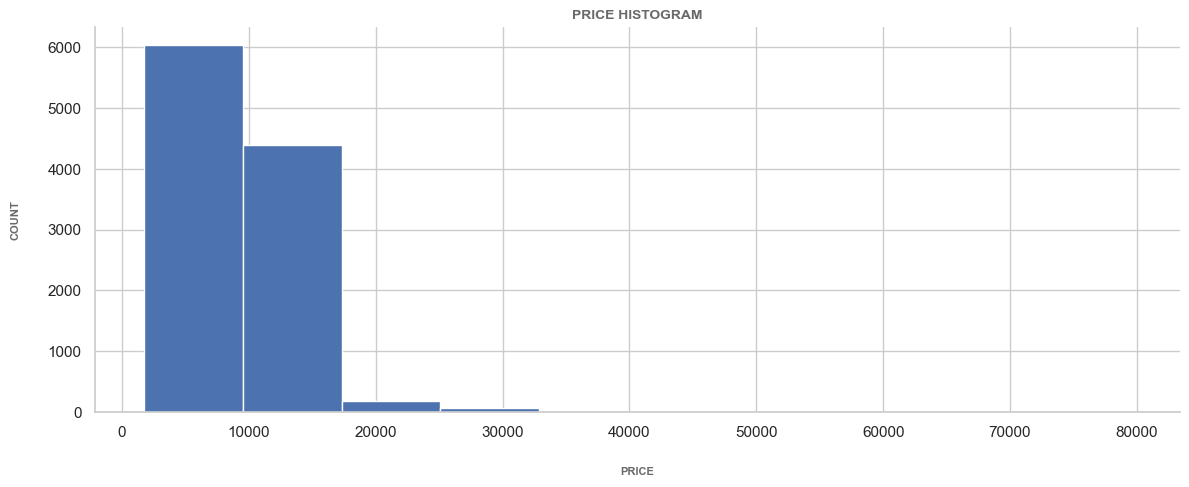

In [581]:
# Histogram graph
plt.figure(figsize=(14, 5))
df["Price"].hist()
sns.despine()
plt.title("PRICE HISTOGRAM", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=8)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=8)

Text(0, 0.5, 'COUNT')

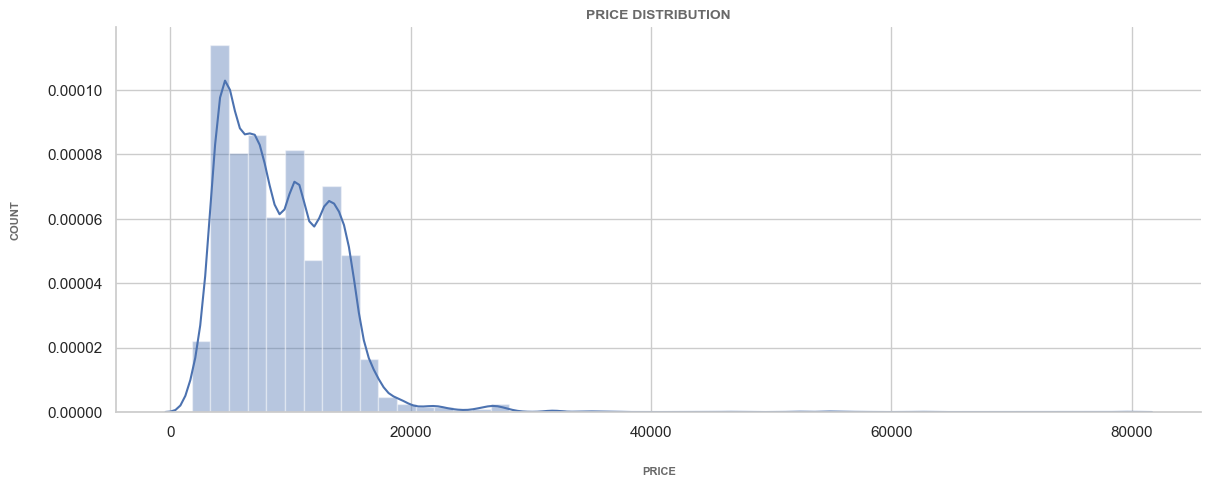

In [582]:
# Distribution
plt.figure(figsize=(14, 5))
sns.distplot(df["Price"])
sns.despine()
plt.title("PRICE DISTRIBUTION", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=8)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=8)

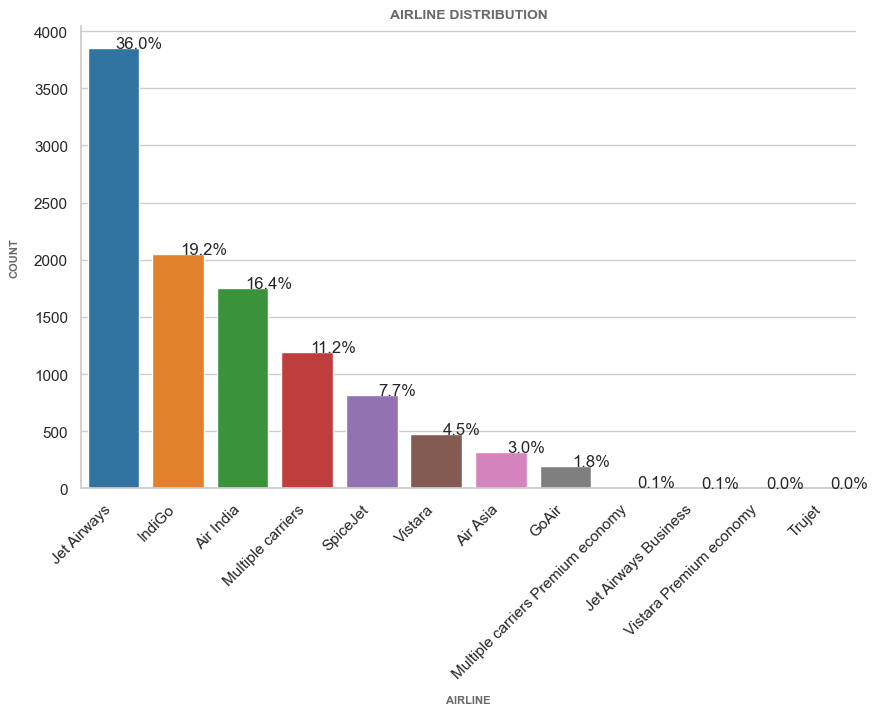

In [583]:
# Distribution Graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

total = float(df.shape[0])

ax = sns.countplot(
    x="Airline", data=df, palette="tab10", order=df["Airline"].value_counts().index
)
sns.despine()
plt.title("AIRLINE DISTRIBUTION", fontsize=10, color="dimgrey", fontweight="bold")
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.xlabel("AIRLINE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=8)
plt.ylabel("COUNT", color="dimgrey", labelpad=10, fontweight="bold", fontsize=8)
plt.xticks(rotation=45, ha="right")
plt.show()

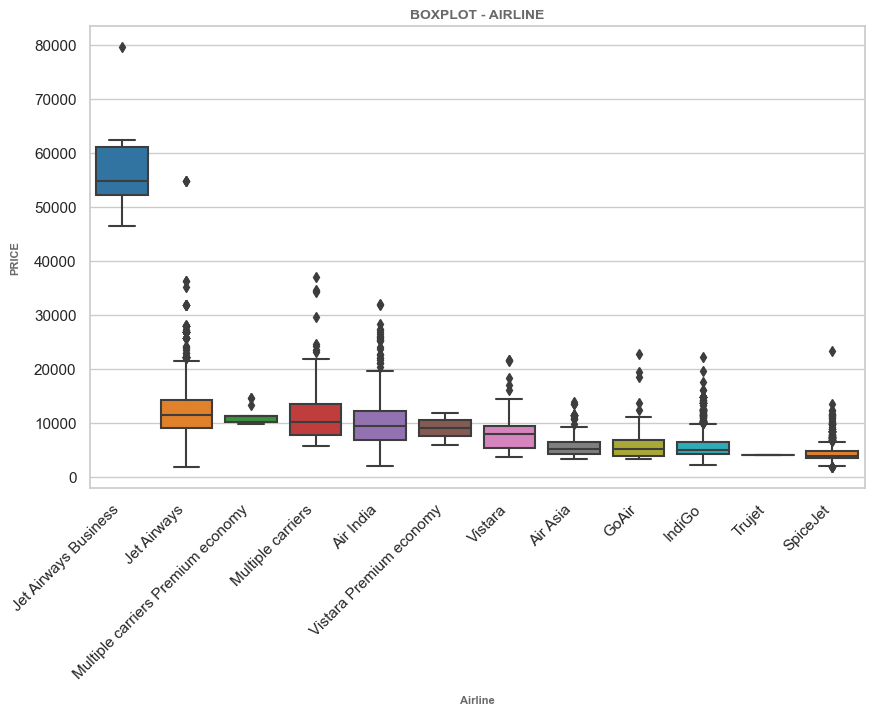

In [584]:
# Boxplot

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Airline",
    y="Price",
    palette="tab10",
    order=df.groupby(["Airline"])["Price"].median().sort_values(ascending=False).index,
)
plt.title("BOXPLOT - AIRLINE", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("Airline", color="dimgrey", labelpad=10, fontweight="bold", fontsize=8)
plt.ylabel("PRICE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=8)
plt.xticks(rotation=45, ha="right")
plt.show()

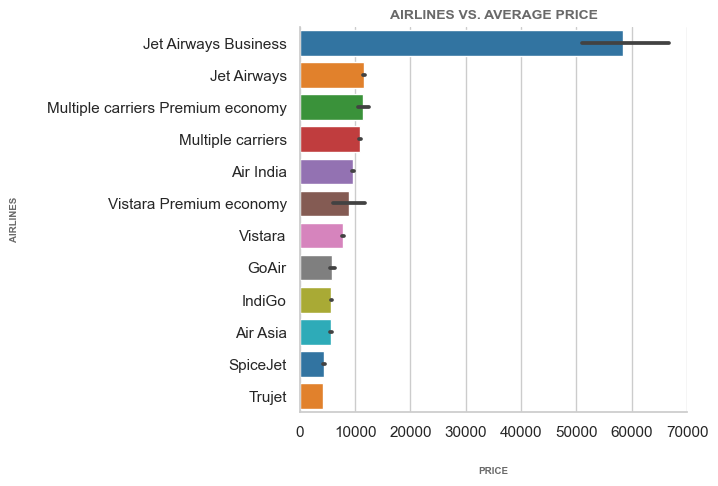

In [585]:
# Average Price Graph

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(
    x="Price",
    y="Airline",
    orient="h",
    data=df,
    palette="tab10",
    order=df.groupby(["Airline"])["Price"].mean().sort_values(ascending=False).index,
)
sns.despine()
plt.title("AIRLINES VS. AVERAGE PRICE", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("AIRLINES", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.show()

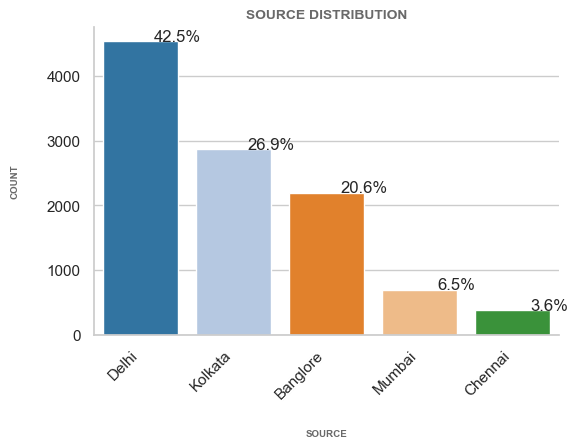

In [586]:
# Distribution Graph
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

total = float(df.shape[0])

ax = sns.countplot(
    x="Source", data=df, palette="tab20", order=df["Source"].value_counts().index
)
sns.despine()
plt.title("SOURCE DISTRIBUTION", fontsize=10, color="dimgrey", fontweight="bold")
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.xlabel("SOURCE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.show()

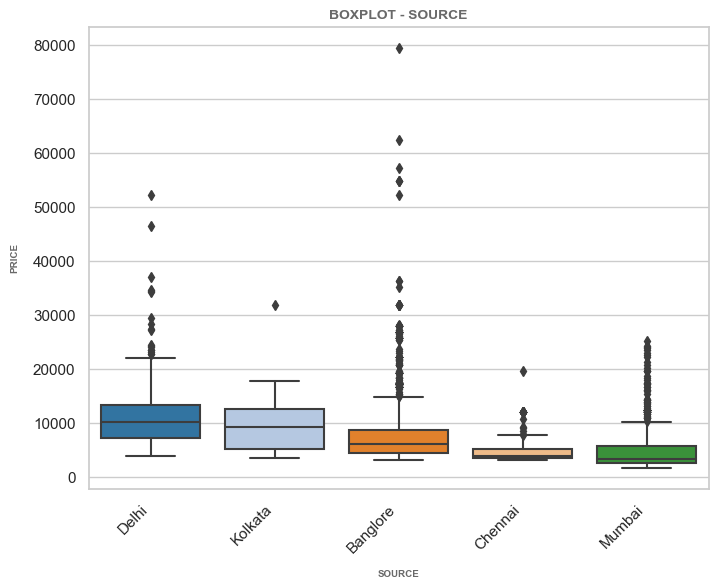

In [587]:
# Boxplot

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Source",
    y="Price",
    palette="tab20",
    order=df.groupby(["Source"])["Price"].median().sort_values(ascending=False).index,
)
plt.title("BOXPLOT - SOURCE", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("SOURCE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.ylabel("PRICE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.show()

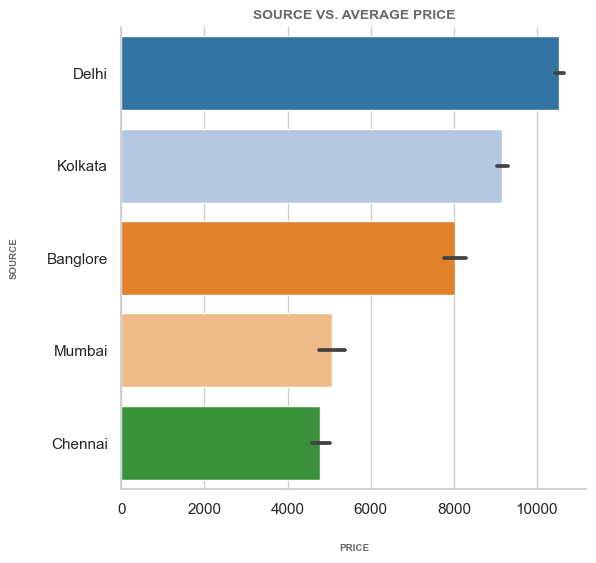

In [588]:
# Average Price Graph

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(
    x="Price",
    y="Source",
    orient="h",
    data=df,
    palette="tab20",
    order=df.groupby(["Source"])["Price"].mean().sort_values(ascending=False).index,
)
sns.despine()
plt.title("SOURCE VS. AVERAGE PRICE", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("SOURCE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.show()

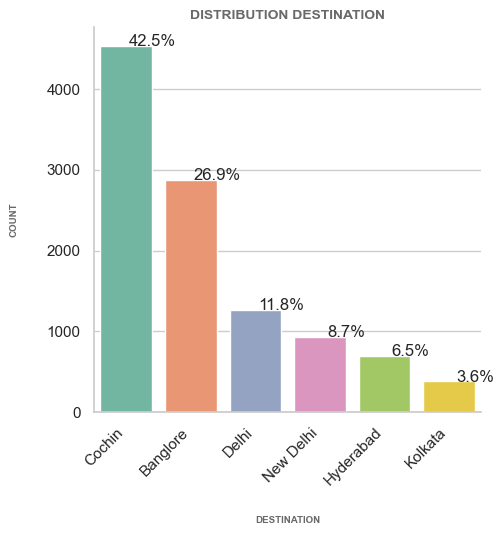

In [589]:
# Disctribution_graph
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

total = float(df.shape[0])

ax = sns.countplot(
    x="Destination",
    data=df,
    palette="Set2",
    order=df["Destination"].value_counts().index,
)
sns.despine()
plt.title("DISTRIBUTION DESTINATION", fontsize=10, color="dimgrey", fontweight="bold")
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.xlabel("DESTINATION", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.show()

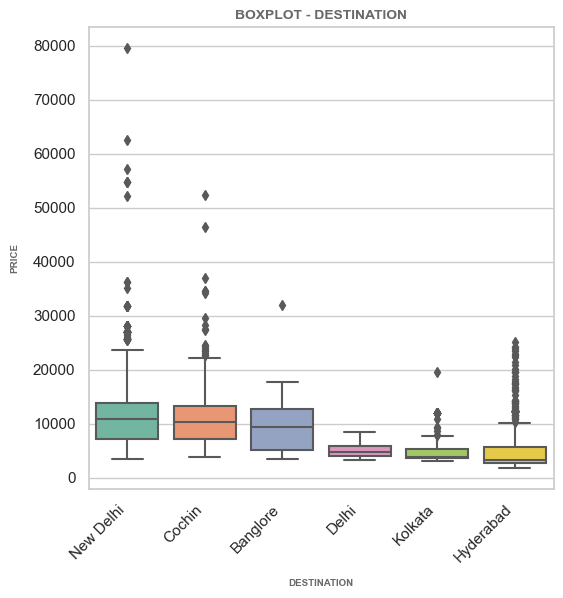

In [590]:
# Boxplot

# Plot
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=df,
    x="Destination",
    y="Price",
    palette="Set2",
    order=df.groupby(["Destination"])["Price"]
    .median()
    .sort_values(ascending=False)
    .index,
)
plt.title("BOXPLOT - DESTINATION", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("DESTINATION", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.ylabel("PRICE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.show()

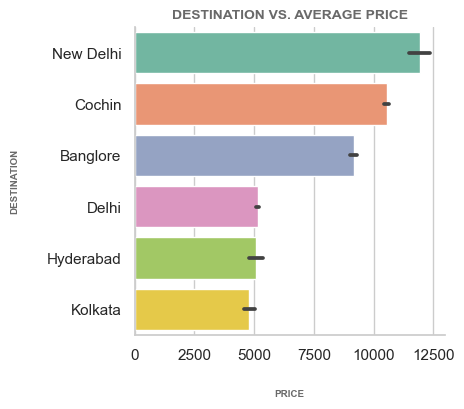

In [591]:
# Average Price Graph

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(
    x="Price",
    y="Destination",
    orient="h",
    data=df,
    palette="Set2",
    order=df.groupby(["Destination"])["Price"]
    .mean()
    .sort_values(ascending=False)
    .index,
)
sns.despine()
plt.title(
    "DESTINATION VS. AVERAGE PRICE", fontsize=10, color="dimgrey", fontweight="bold"
)
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("DESTINATION", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.show()

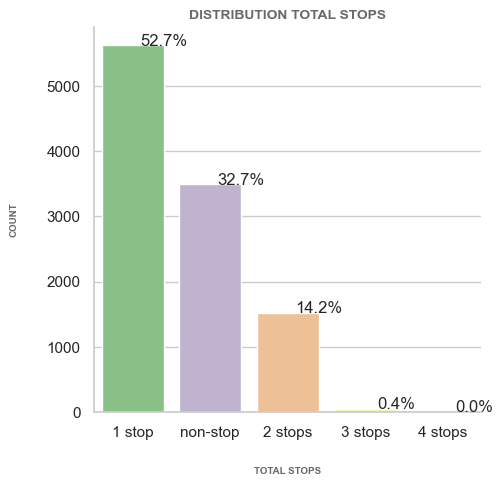

In [592]:
# Distribution Graph
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

total = float(df.shape[0])

ax = sns.countplot(
    x="Total_Stops",
    data=df,
    palette="Accent",
    order=df["Total_Stops"].value_counts().index,
)
sns.despine()
plt.title("DISTRIBUTION TOTAL STOPS", fontsize=10, color="dimgrey", fontweight="bold")
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.xlabel("TOTAL STOPS", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.show()

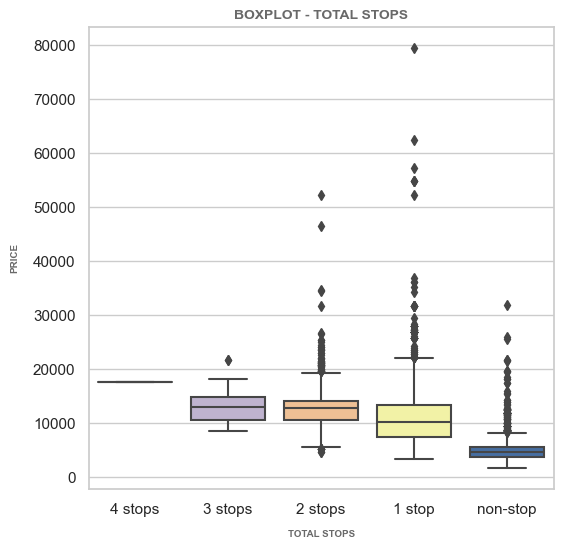

In [593]:
# Boxplot

# Plot
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=df,
    x="Total_Stops",
    y="Price",
    palette="Accent",
    order=df.groupby(["Total_Stops"])["Price"]
    .median()
    .sort_values(ascending=False)
    .index,
)
plt.title("BOXPLOT - TOTAL STOPS", fontsize=10, color="dimgrey", fontweight="bold")
plt.xlabel("TOTAL STOPS", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.ylabel("PRICE", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.show()

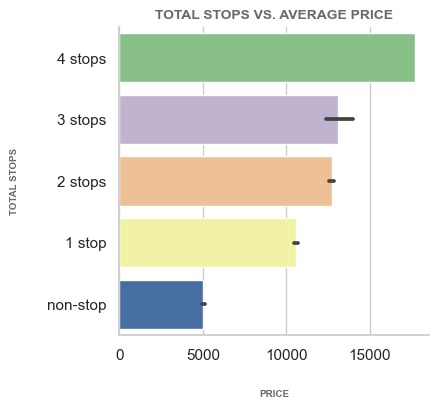

In [594]:
# Average Price Graph

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(
    x="Price",
    y="Total_Stops",
    orient="h",
    data=df,
    palette="Accent",
    order=df.groupby(["Total_Stops"])["Price"]
    .mean()
    .sort_values(ascending=False)
    .index,
)
sns.despine()
plt.title(
    "TOTAL STOPS VS. AVERAGE PRICE", fontsize=10, color="dimgrey", fontweight="bold"
)
plt.xlabel("PRICE", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.ylabel("TOTAL STOPS", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.show()

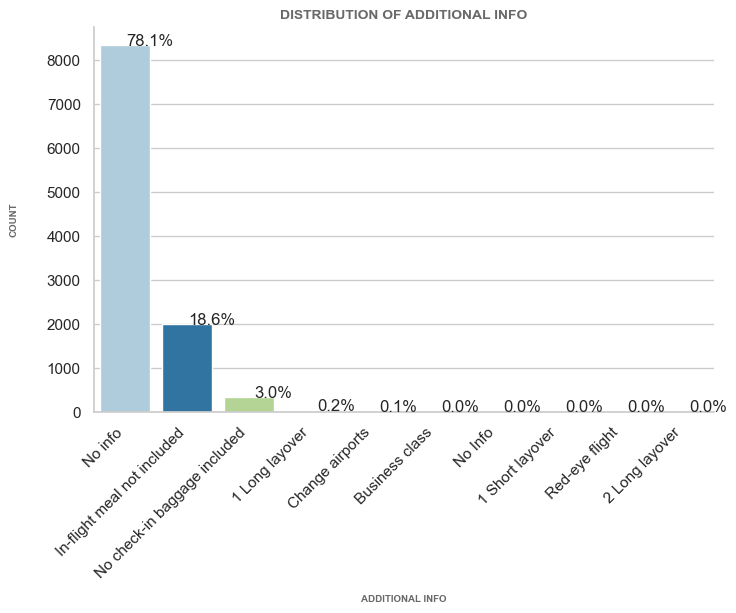

In [595]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

total = float(df.shape[0])

ax = sns.countplot(
    x="Additional_Info",
    data=df,
    palette="Paired",
    order=df["Additional_Info"].value_counts().index,
)
sns.despine()
plt.title(
    "DISTRIBUTION OF ADDITIONAL INFO", fontsize=10, color="dimgrey", fontweight="bold"
)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center")
plt.xlabel(
    "ADDITIONAL INFO", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7
)
plt.ylabel("COUNT", color="dimgrey", labelpad=20, fontweight="bold", fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.show()

SOME CONCLUSIONS:

Most prices are in a range of up to 20000, but outliers are present.

Jet Airways is the most frequent airline. However, Jet Airways Business has an average price much higher than the other lines.

Delhi is where most flights depart from and has the highest average price.

Cochin is the destination with the highest number of flights. However, New Delhi is the destination with the highest average price.

A little more than half of the flights have only one stop and the greater the number of stops, the higher the average price.

In the information column, the vast majority do not contain information and the rest are not relevant to the model.

2 . Preprocessing

2.1 - Deleting Duplicate Fields

In [596]:
df.drop_duplicates(inplace=True)

# Check Duplicate Fields
df.duplicated().sum()

0

2.2 - Exclusion of null values

In [597]:
df.dropna(inplace=True)
# Check for Null Values in Dataset
df.isnull().sum().sort_values(ascending=False)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

2.3 - Feature Engineer

In [598]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["year_of_journey"] = df["Date_of_Journey"].dt.year
df["month_of_journey"] = df["Date_of_Journey"].dt.month
df["day_of_journey"] = df["Date_of_Journey"].dt.day
df.drop(columns=["Date_of_Journey"], inplace=True)

In [599]:
df["year_of_journey"].value_counts()

2019    10462
Name: year_of_journey, dtype: int64

In [600]:
df["year_of_journey"].nunique()

1

NOTE: As all trips were made in 2019, we can exclude this variable as it is not relevant for the elaboration of the model.

In [601]:
df.drop(columns=["year_of_journey"], inplace=True)

NOTE: Let's exclude this variable because the source and destination variables have the same information.

In [602]:
df.drop(["Route"], axis=1, inplace=True)

In [603]:
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis=1, inplace=True)

In [604]:
df["Total_Stops"] = df["Total_Stops"].str.replace("non-stop", "0")
df["Total_Stops"] = df["Total_Stops"].str.replace("stops", "")
df["Total_Stops"] = df["Total_Stops"].str.replace("stop", "")
df["Total_Stops"] = df["Total_Stops"].astype(int)

In [605]:
df["Duration_Total_Hour"] = (
    df["Duration"]
    .str.replace("h", "*1")
    .str.replace(" ", "+")
    .str.replace("m", "/60")
    .apply(eval)
)
df.drop(columns=["Duration"], inplace=True)

In [606]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"], axis=1, inplace=True)

NOTE: We can exclude this variable since it does not present relevant information for the elaboration of the model according to the exploratory analysis that was carried out.

In [607]:
df.drop(["Additional_Info"], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,2.833333,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7.416667,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,19.000000,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5.416667,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4.750000,21,35


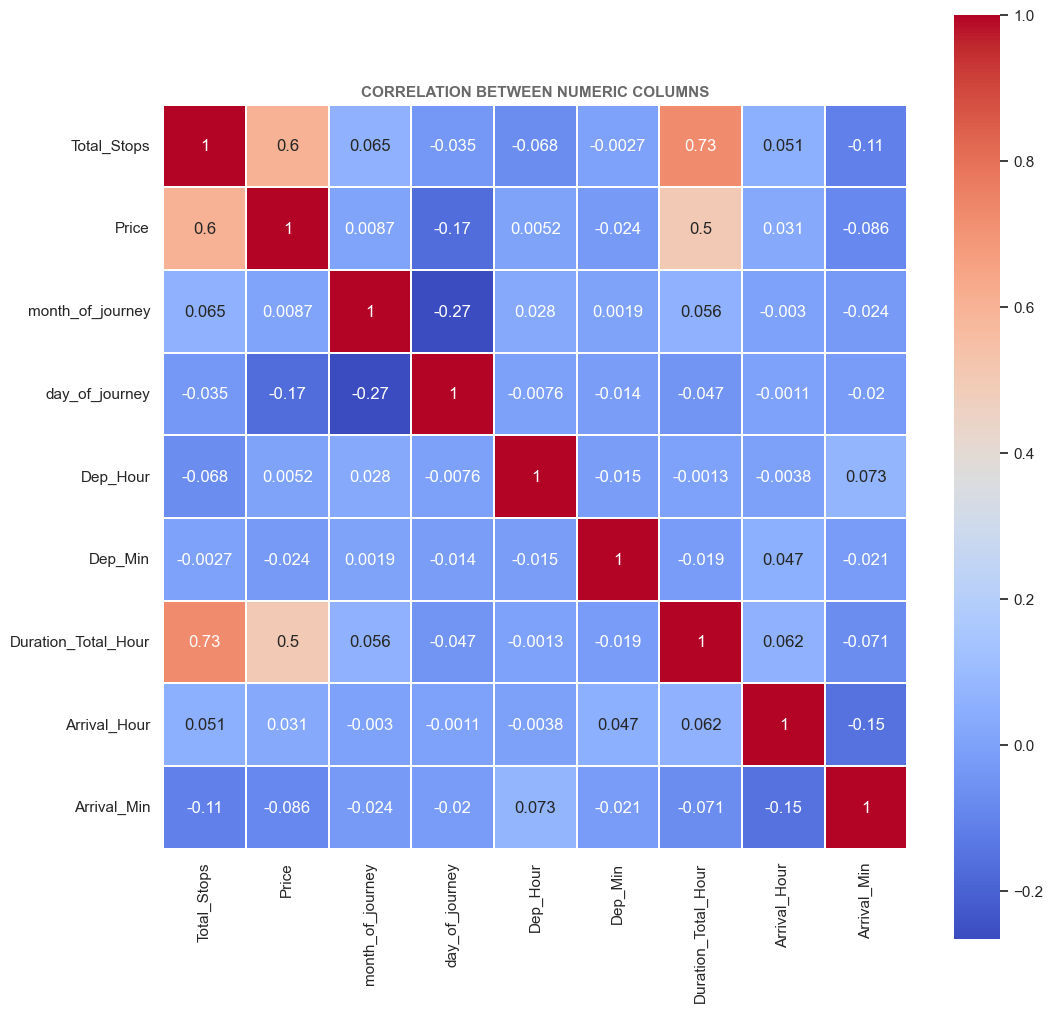

In [608]:
# Correlation between columns
plt.figure(figsize=(12, 12))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.2, cmap="coolwarm", square=True)
plt.title(
    "CORRELATION BETWEEN NUMERIC COLUMNS",
    fontsize=11,
    color="dimgrey",
    fontweight="bold",
)
plt.show()

From the correlation chart we can identify strong relationships between: Total_Stops and Duration_Total_Hours. It may be necessary to eliminate one of the two, given that both have very similar information.

In [609]:
# sns.pairplot(df, kind="reg")

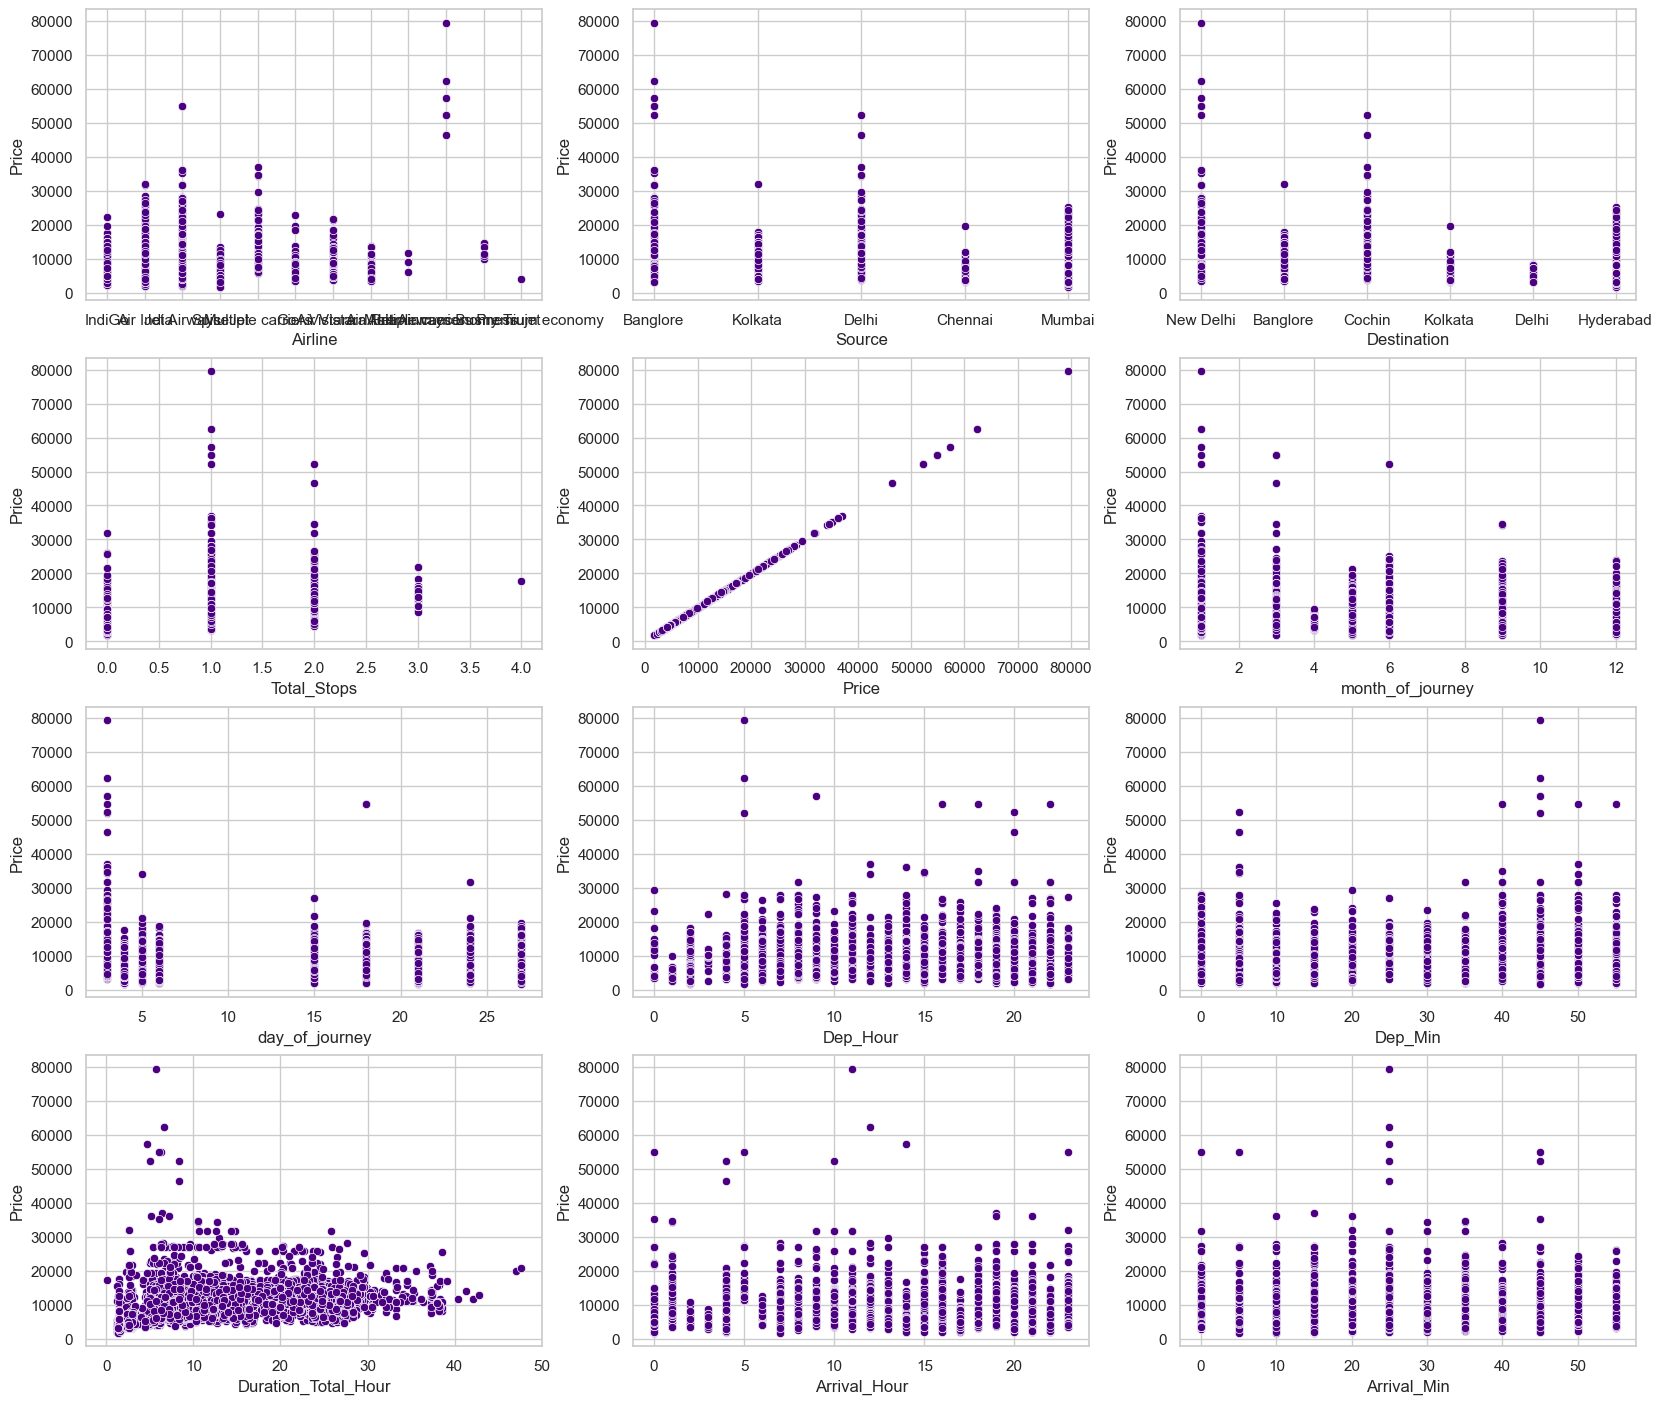

In [610]:
plt.figure(figsize=(20, 40))
x = 1
for d in df:
    plt.subplot(9, 3, x)
    sns.scatterplot(data=df, x=d, y="Price", color="indigo")
    x += 1

2.4 - Split into Training and Test data

In [611]:
X = df.drop(columns="Price")
Y = df["Price"]

In [612]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=18
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7323, 11), (3139, 11), (7323,), (3139,))

In [613]:
X_train.head()

,Airline,Source,Destination,Total_Stops,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min
8513,SpiceJet,Banglore,Delhi,0,1,4,5,55,2.666667,8,35
10458,Multiple carriers,Delhi,Cochin,1,1,3,14,35,7.750000,22,20
9701,Multiple carriers,Delhi,Cochin,1,6,27,8,30,10.500000,19,0
8636,IndiGo,Delhi,Cochin,1,6,27,7,35,8.583333,16,10
6728,IndiGo,Delhi,Cochin,0,6,15,5,35,3.250000,8,50


2.5 - Encoding

In [614]:
X_train = pd.get_dummies(
    X_train,
    prefix=["Airline", "Source", "Destination"],
    columns=["Airline", "Source", "Destination"],
)

In [615]:
X_train.head(10)

,Total_Stops,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8513,0,1,4,5,55,2.666667,8,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10458,1,1,3,14,35,7.750000,22,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9701,1,6,27,8,30,10.500000,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8636,1,6,27,7,35,8.583333,16,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6728,0,6,15,5,35,3.250000,8,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1557,1,3,6,17,45,7.750000,1,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2414,2,6,3,5,25,23.000000,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7140,0,5,21,8,30,2.833333,11,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
305,1,3,27,13,0,15.416667,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4000,0,3,6,7,10,2.916667,10,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [616]:
X_train.shape

(7323, 31)

In [617]:
X_train.reset_index(drop=True, inplace=True)
X_train.head(10)

,Total_Stops,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,4,5,55,2.666667,8,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,1,3,14,35,7.750000,22,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,6,27,8,30,10.500000,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6,27,7,35,8.583333,16,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,6,15,5,35,3.250000,8,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,1,3,6,17,45,7.750000,1,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,2,6,3,5,25,23.000000,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,5,21,8,30,2.833333,11,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,1,3,27,13,0,15.416667,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,0,3,6,7,10,2.916667,10,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


3. Multicollinearity - Variance Inflation Factor (VIF)

Multicollinearity occurs when independent variables are highly correlated with each other. The variance inflation factor VIF identifies the correlation between the independent variables and the strength of that correlation. If VIF > 5 is a cause for concern and if VIF > 10 indicates a serious collinearity problem.

Although multicollinearity does not have a great influence on the predictive capacity of a model, it directly affects the importance scores of the predictors used to build the model, the more correlated variables we have, the lower the importance of all of them simultaneously, it is as if the collinear variables shared the importance between them. Thus, the purpose of using the VIF in this project is just to check multicollinearity for more accurate variable selection.

In [618]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
15,Airline_Multiple carriers Premium economy,inf
16,Airline_SpiceJet,inf
29,Destination_Kolkata,inf
28,Destination_Hyderabad,inf
27,Destination_Delhi,inf
26,Destination_Cochin,inf
25,Destination_Banglore,inf
24,Source_Mumbai,inf
23,Source_Kolkata,inf
22,Source_Delhi,inf


NOTE: In the case of dummy variables that represent a categorical variable with three or more categories, they will necessarily have high VIF values if there is a small number of cases in the category, even if the categorical variable is not associated with other variables in the regression model. Thus, the high VIF values of the dummy variables are not relevant and can be disregarded.

Therefore, we will calculate the VIF only for numeric variables.

In [619]:
# Listing categorical and numeric columns:
Num_col = list(X_train.select_dtypes(include=["float64", "int64"]).columns)
print("Numerical Variables:", Num_col)

Numerical Variables: ['month_of_journey', 'day_of_journey', 'Dep_Hour', 'Dep_Min', 'Duration_Total_Hour', 'Arrival_Hour', 'Arrival_Min']


In [620]:
X_train_num = pd.DataFrame(
    X_train,
    columns=[
        "Total_Stops",
        "month_of_journey",
        "day_of_journey",
        "Dep_Hour",
        "Dep_Min",
        "Duration_Total_Hour",
        "Arrival_Hour",
        "Arrival_Min",
    ],
)

X_train_num.head()

,Total_Stops,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min
0,0,1,4,5,55,2.666667,8,35
1,1,1,3,14,35,7.750000,22,20
2,1,6,27,8,30,10.500000,19,0
3,1,6,27,7,35,8.583333,16,10
4,0,6,15,5,35,3.250000,8,50


In [621]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif["Features"] = X_train_num.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_num.values, i)
    for i in range(X_train_num.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Duration_Total_Hour,5.53
0,Total_Stops,5.30
3,Dep_Hour,4.80
6,Arrival_Hour,4.08
1,month_of_journey,3.83
7,Arrival_Min,2.85
2,day_of_journey,2.69
4,Dep_Min,2.51


There is a high value of VIF in Duration_Total_Hour and Total_Stops. In the exploratory analysis, through the correlation graph, we had already detected a strong correlation between the two, now we have more evidence through the VIF. So, let's delete the Total_Stops variable because Duration_Total_Hour already carries the necessary information.

In [622]:
X_train_num = X_train_num.drop(
    "Total_Stops",
    1,
)

In [623]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif["Features"] = X_train_num.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_num.values, i)
    for i in range(X_train_num.shape[1])
]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Dep_Hour,4.79
5,Arrival_Hour,4.07
0,month_of_journey,3.78
6,Arrival_Min,2.84
1,day_of_journey,2.67
3,Dep_Min,2.50
4,Duration_Total_Hour,2.45


Now all numerical values have an acceptable VIF value and we can do feature selection.

In [624]:
X_train = X_train.drop(
    "Total_Stops",
    1,
)
X_train.head()

,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,4,5,55,2.666667,8,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,3,14,35,7.750000,22,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,6,27,8,30,10.500000,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,6,27,7,35,8.583333,16,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,6,15,5,35,3.250000,8,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


4. Feature Selection

4.1 - ExtraTreesRegressor

In [625]:
# Ensemble Method for Selection of Variables
# Attribute importance with Extra Trees Regressor

# Model Creation - Feature Selection
modelo = ExtraTreesRegressor(random_state=18)
modelo.fit(X_train, Y_train)

# Print of Results
print(modelo.feature_importances_), print(len(modelo.feature_importances_))

[8.70781185e-02 1.07811145e-01 3.07809391e-02 3.67212776e-02
 2.17139673e-01 3.40887594e-02 2.93222935e-02 2.73599943e-03
 4.04128816e-02 1.98474645e-03 9.27843656e-03 1.50523012e-01
 7.90641685e-02 5.06551507e-02 7.31114552e-04 3.08855453e-03
 6.48154102e-05 5.98517395e-03 1.91386654e-04 7.68441644e-03
 4.36383262e-04 5.12650828e-03 3.12899528e-03 1.53537514e-02
 2.94160903e-03 4.82386424e-03 3.86772668e-02 1.67574574e-02
 4.91759703e-04 1.69203422e-02]
30


(None, None)

In [626]:
# Transformation into pandas series
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)

In [627]:
# Most important features
feat_importances.sort_values(ascending=False)

Duration_Total_Hour                          0.217140
Airline_Jet Airways                          0.150523
day_of_journey                               0.107811
month_of_journey                             0.087078
Airline_Jet Airways Business                 0.079064
Airline_Multiple carriers                    0.050655
Airline_Air India                            0.040413
Destination_Delhi                            0.038677
Dep_Min                                      0.036721
Arrival_Hour                                 0.034089
Dep_Hour                                     0.030781
Arrival_Min                                  0.029322
Destination_New Delhi                        0.016920
Destination_Hyderabad                        0.016757
Source_Mumbai                                0.015354
Airline_IndiGo                               0.009278
Source_Banglore                              0.007684
Airline_Vistara                              0.005985
Source_Delhi                

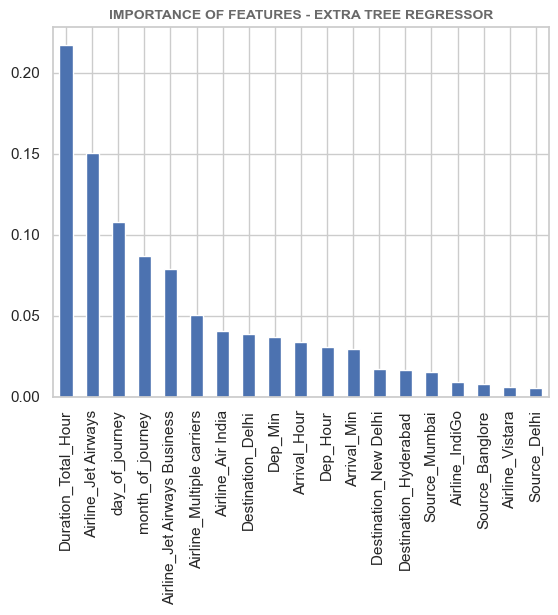

In [628]:
# Graph of the most important variables - ExtraTreesRegressor
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)
feat_importances.nlargest(19).plot.bar()
plt.title(
    "IMPORTANCE OF FEATURES - EXTRA TREE REGRESSOR",
    fontsize=10,
    color="dimgrey",
    fontweight="bold",
)
plt.show()

5. Baseline Models with Cross Validation

Initially we will evaluate several regression models without any hyperparameter through Cross Validation. The metric chosen for evaluation will be the R-square (R2), a statistical measure that represents the proportion of the variance of a dependent variable that is explained by an independent variable or variables in regression problems. Thus, the larger the R², the more explanatory the linear model is, that is, the better it fits the sample.

5.1 - No Normalized or Standardized Data

In [629]:
X_train = pd.DataFrame(
    X_train,
    columns=[
        "Duration_Total_Hour",
        "Airline_Jet Airways",
        "day_of_journey",
        "month_of_journey",
        "Airline_Jet Airways Business",
        "Airline_Multiple carriers",
        "Airline_Air India",
        "Destination_Delhi",
        "Dep_Min",
        "Arrival_Hour",
        "Dep_Hour",
        "Arrival_Min",
        "Destination_New Delhi",
        "Destination_Hyderabad",
        "Source_Mumbai",
        "Airline_IndiGo",
        "Source_Banglore",
        "Airline_Vistara",
        "Source_Delhi",
    ],
)

X_train.head()

,Duration_Total_Hour,Airline_Jet Airways,day_of_journey,month_of_journey,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Air India,Destination_Delhi,Dep_Min,Arrival_Hour,Dep_Hour,Arrival_Min,Destination_New Delhi,Destination_Hyderabad,Source_Mumbai,Airline_IndiGo,Source_Banglore,Airline_Vistara,Source_Delhi
0,2.666667,0,4,1,0,0,0,1,55,8,5,35,0,0,0,0,1,0,0
1,7.750000,0,3,1,0,1,0,0,35,22,14,20,0,0,0,0,0,0,1
2,10.500000,0,27,6,0,1,0,0,30,19,8,0,0,0,0,0,0,0,1
3,8.583333,0,27,6,0,0,0,0,35,16,7,10,0,0,0,1,0,0,1
4,3.250000,0,15,6,0,0,0,0,35,8,5,50,0,0,0,1,0,0,1


In [630]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('SVR', SVR()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('LGBMRegressor', ltb.LGBMRegressor()))
models.append(('BaggingRegressor', BaggingRegressor()))

# Evaluating each model in a loop 

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 6590, number of used features: 18
[LightGBM] [Info] Start training from score 9020.849165
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 6590, number of used features: 18
[LightGBM] [Info] Start training from score 9052.656753
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

,Model,Mean,STD
4,XGBRegressor,81.392669,2.504304
3,RandomForestRegressor,79.487730,2.798192
9,BaggingRegressor,78.856287,2.491639
8,LGBMRegressor,78.514812,4.570105
2,GradientBoostingRegressor,75.005623,3.494065
6,DecisionTreeRegressor,66.162274,7.451822
0,LinearRegression,56.605861,3.954455
1,KNeighborsRegressor,53.786724,4.106629
7,AdaBoostRegressor,28.829971,11.489762
5,SVR,0.058250,1.291521


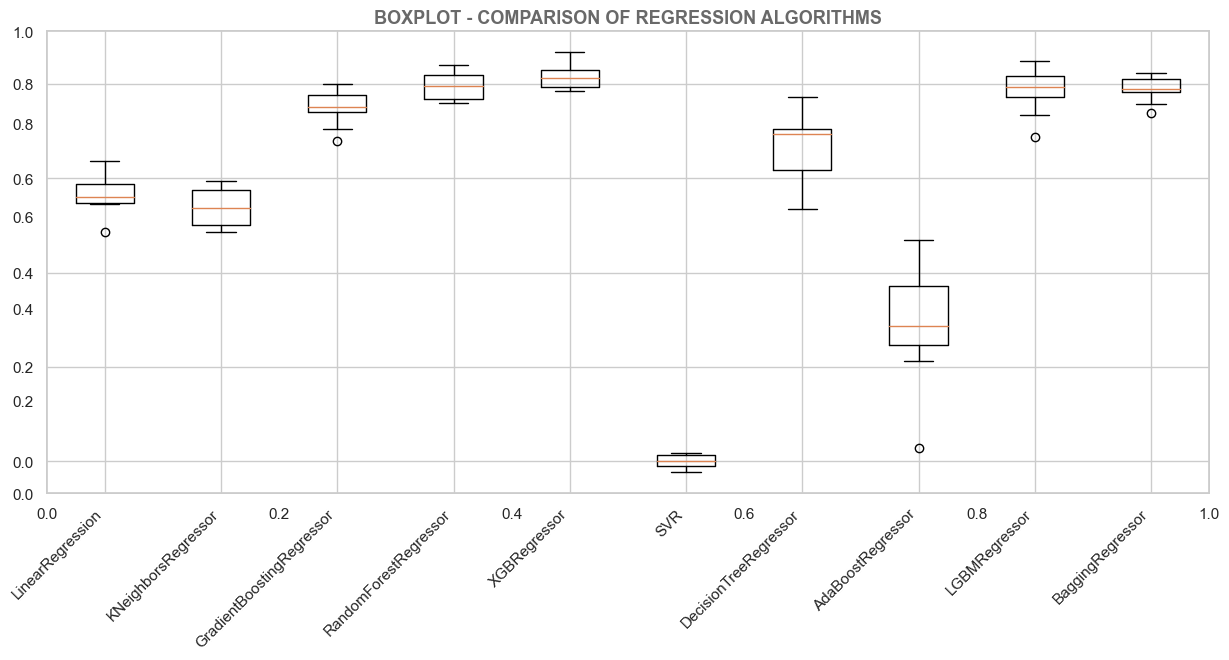

In [631]:
# Boxplot to compare the algorithms

fig = plt.figure(figsize=(15, 6))
plt.title(
    "BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS",
    fontsize=13,
    color="dimgrey",
    fontweight="bold",
)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha="right")
plt.show()

NOTE: Tree-based methods such as Bagging, Random Forests and Boosting do not require the data to be normalized or standardized. However, the LinearRegression, KNeighborsRegressor and SVR algorithms considerably improve their result with normalized or standardized data. In view of this, we will evaluate these algorithms with normalized and standardized data and verify if they surpass the results of tree-based algorithms.

5.2 - Normalized Data

5.2.1 - Normalization

In [632]:
# Numeric Columns
num_col = [
    "month_of_journey",
    "day_of_journey",
    "Dep_Hour",
    "Dep_Min",
    "Duration_Total_Hour",
    "Arrival_Hour",
    "Arrival_Min",
]

In [633]:
# Copy of the DataFrame
X_train_norm = X_train.copy()

In [634]:
# Creation of the normalizer
normalization = MinMaxScaler()

In [635]:
# Apply the normalization
X_train_norm[num_col] = normalization.fit_transform(X_train[num_col])

In [636]:
# Statistical Summary of Normalized Data
X_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_Total_Hour,7323.0,0.218946,0.175023,0.0,0.057793,0.176883,0.316988,1.0
Airline_Jet Airways,7323.0,0.349857,0.476957,0.0,0.000000,0.000000,1.000000,1.0
day_of_journey,7323.0,0.401970,0.366416,0.0,0.083333,0.125000,0.750000,1.0
month_of_journey,7323.0,0.415751,0.272681,0.0,0.181818,0.363636,0.454545,1.0
Airline_Jet Airways Business,7323.0,0.000683,0.026123,0.0,0.000000,0.000000,0.000000,1.0
Airline_Multiple carriers,7323.0,0.115800,0.320006,0.0,0.000000,0.000000,0.000000,1.0
Airline_Air India,7323.0,0.163458,0.369808,0.0,0.000000,0.000000,0.000000,1.0
Destination_Delhi,7323.0,0.122081,0.327402,0.0,0.000000,0.000000,0.000000,1.0
Dep_Min,7323.0,0.441498,0.340420,0.0,0.090909,0.454545,0.727273,1.0
Arrival_Hour,7323.0,0.583973,0.296853,0.0,0.347826,0.608696,0.826087,1.0


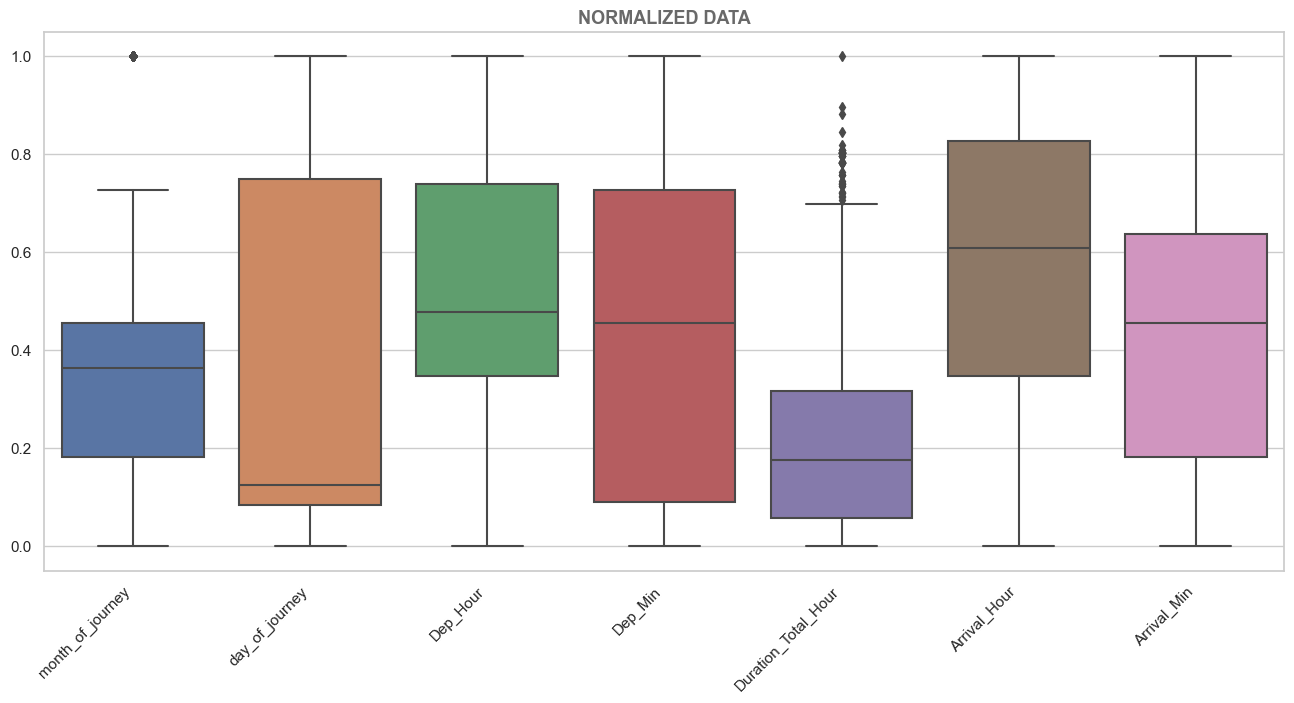

In [637]:
# Boxplot Normalized Data

# Plot
plt.figure(figsize=(16, 7))
ax = sns.boxplot(data=X_train_norm[num_col])
plt.xticks(rotation=45, ha="right")
plt.title("NORMALIZED DATA", fontsize=13, color="dimgrey", fontweight="bold")
plt.show()

In [638]:
# Creation of DataFrame with Normalized Data
X_train_norm = pd.DataFrame(
    X_train_norm,
    columns=[
        "Duration_Total_Hour",
        "Airline_Jet Airways",
        "day_of_journey",
        "month_of_journey",
        "Airline_Jet Airways Business",
        "Airline_Multiple carriers",
        "Airline_Air India",
        "Destination_Delhi",
        "Dep_Min",
        "Arrival_Hour",
        "Dep_Hour",
        "Arrival_Min",
        "Destination_New Delhi",
        "Destination_Hyderabad",
        "Source_Mumbai",
        "Airline_IndiGo",
        "Source_Banglore",
        "Airline_Vistara",
        "Source_Delhi",
    ],
)

In [639]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('SVR', SVR()))


# Evaluating each model in a loop

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_norm, Y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Model": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: total: 30.7 s
Wall time: 34.8 s


,Model,Mean,STD
1,KNeighborsRegressor,68.273477,5.576629
0,LinearRegression,56.606699,3.953909
2,SVR,3.681394,1.612046


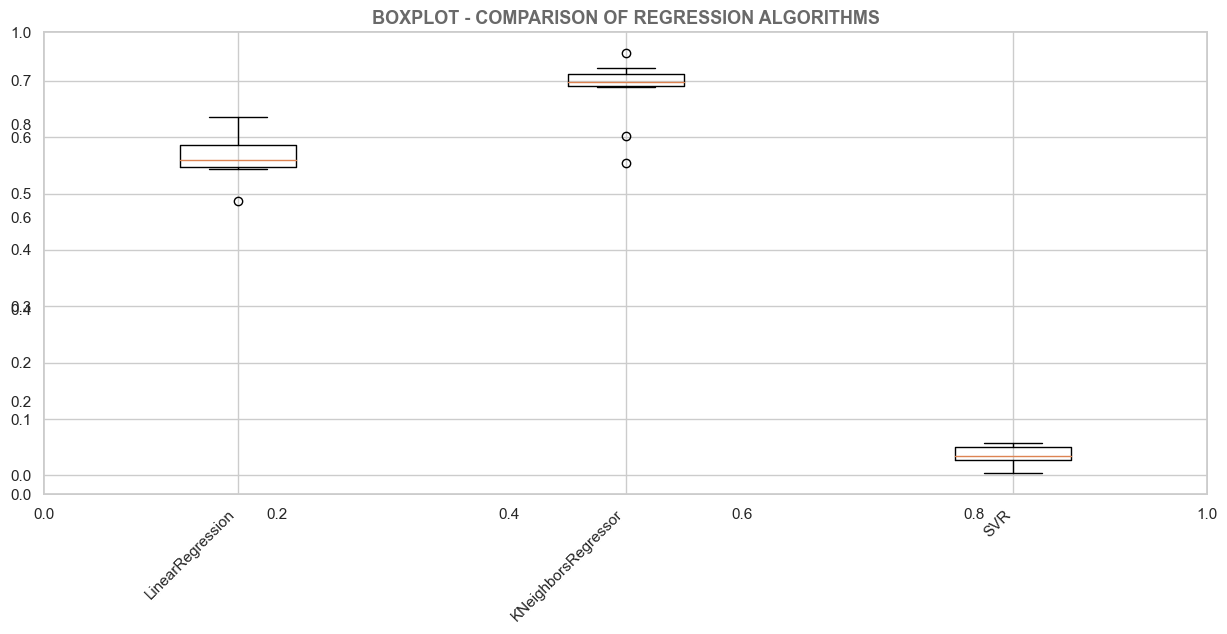

In [640]:
# Boxplot to compare the algorithms

# Plot
fig = plt.figure(figsize=(15, 6))
plt.title(
    "BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS",
    fontsize=13,
    color="dimgrey",
    fontweight="bold",
)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha="right")
plt.show()

5.3 - Standardized Data

5.3.1 - Standardization

In [641]:
# Copy of the DataFrame
X_train_padr = X_train.copy()

In [642]:
# Standardizer
standardization = StandardScaler()

In [643]:
# Apply the standardization
X_train_padr[num_col] = standardization.fit_transform(X_train[num_col])
# Statistical Summary Standardized Data
X_train_padr.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_Total_Hour,7323.0,2.072098e-16,1.000068,-1.251042,-0.920815,-0.240348,0.560202,4.462881
Airline_Jet Airways,7323.0,3.498566e-01,0.476957,0.000000,0.000000,0.000000,1.000000,1.000000
day_of_journey,7323.0,2.262593e-16,1.000068,-1.097107,-0.869663,-0.755941,0.949888,1.632220
month_of_journey,7323.0,-2.530408e-16,1.000068,-1.524786,-0.857960,-0.191133,0.142280,2.142759
Airline_Jet Airways Business,7323.0,6.827803e-04,0.026123,0.000000,0.000000,0.000000,0.000000,1.000000
Airline_Multiple carriers,7323.0,1.157995e-01,0.320006,0.000000,0.000000,0.000000,0.000000,1.000000
Airline_Air India,7323.0,1.634576e-01,0.369808,0.000000,0.000000,0.000000,0.000000,1.000000
Destination_Delhi,7323.0,1.220811e-01,0.327402,0.000000,0.000000,0.000000,0.000000,1.000000
Dep_Min,7323.0,-5.580394e-17,1.000068,-1.297012,-1.029944,0.038330,0.839535,1.640740
Arrival_Hour,7323.0,2.709229e-16,1.000068,-1.967350,-0.795557,0.083288,0.815659,1.401555


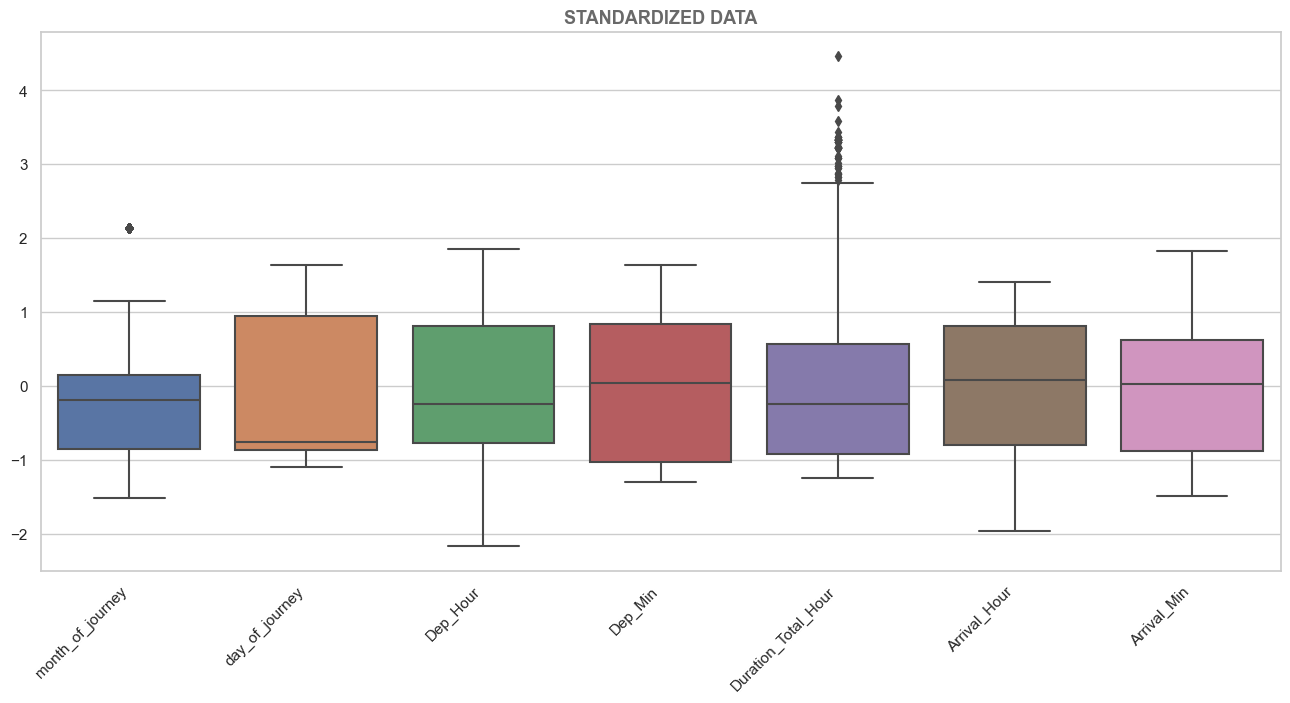

In [644]:
# Boxplot Standardized Data

# Plot
plt.figure(figsize=(16, 7))
ax = sns.boxplot(data=X_train_padr[num_col])
plt.xticks(rotation=45, ha="right")
plt.title("STANDARDIZED DATA", fontsize=13, color="dimgrey", fontweight="bold")
plt.show()

In [645]:
# Creation of DataFrame with Standardized Data
X_train_padr = pd.DataFrame(
    X_train_padr,
    columns=[
        "Duration_Total_Hour",
        "Airline_Jet Airways",
        "day_of_journey",
        "month_of_journey",
        "Airline_Jet Airways Business",
        "Airline_Multiple carriers",
        "Airline_Air India",
        "Destination_Delhi",
        "Dep_Min",
        "Arrival_Hour",
        "Dep_Hour",
        "Arrival_Min",
        "Destination_New Delhi",
        "Destination_Hyderabad",
        "Source_Mumbai",
        "Airline_IndiGo",
        "Source_Banglore",
        "Airline_Vistara",
        "Source_Delhi",
    ],
)

In [646]:
print(type(X_train_padr))

<class 'pandas.core.frame.DataFrame'>


In [647]:
%%time

# Predictive Model Selection

# Defining values for the number of folds
num_folds = 10
seed = 18

# list of models


models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('SVR', SVR()))


# Evaluating each model in a loop 

names = []
results = []
results_mean = []
results_std = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_padr, Y_train, cv = kfold, scoring='r2')
    results.append(cv_results)
    results_mean.append(cv_results.mean()*100)
    results_std.append(cv_results.std()*100)
    names.append(name)

model_result = pd.DataFrame({
    "Modelo": names,
    "Mean": results_mean,
    "STD": results_std})

model_result.sort_values('Mean', ascending=False)

CPU times: total: 32 s
Wall time: 34.4 s


,Modelo,Mean,STD
1,KNeighborsRegressor,66.691260,4.972641
0,LinearRegression,56.605861,3.954455
2,SVR,1.592516,1.411273


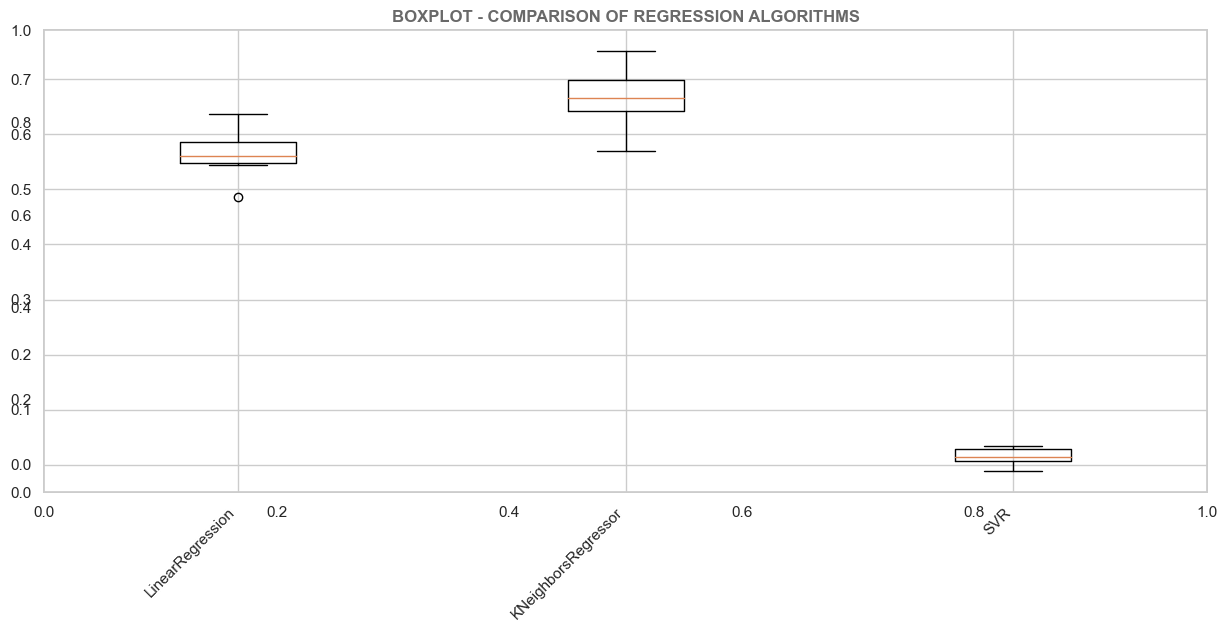

In [648]:
# Boxplot to compare the algorithms

# Plot
fig = plt.figure(figsize=(15, 6))
plt.title(
    "BOXPLOT - COMPARISON OF REGRESSION ALGORITHMS",
    fontsize=12,
    color="dimgrey",
    fontweight="bold",
)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45, ha="right")
plt.show()

Conclusion: We tested algorithms that are not based on trees like KNeighborsRegressor, LinearRegression and SVR on normalized and standardized data and obtained an improvement in the results in both cases. However, tree-based models still showed the best results.

We will choose the three best models evaluated through Cross Validation to apply hyperparameter tuning.

6. Preprocessing for the Test Data

In [649]:
X_test.head()

,Airline,Source,Destination,Total_Stops,month_of_journey,day_of_journey,Dep_Hour,Dep_Min,Duration_Total_Hour,Arrival_Hour,Arrival_Min
3170,Jet Airways,Banglore,New Delhi,1,3,21,16,55,17.500000,10,25
7574,Jet Airways,Delhi,Cochin,2,6,24,5,30,7.083333,12,35
5644,Jet Airways,Banglore,New Delhi,1,3,18,14,5,5.083333,19,10
2614,SpiceJet,Kolkata,Banglore,0,1,5,9,0,2.416667,11,25
10213,Vistara,Kolkata,Banglore,1,3,24,20,20,22.416667,18,45


# DUMMIES

X_test = pd.get_dummies(
    X_test,
    prefix=["Airline", "Source", "Destination"],
    columns=["Airline", "Source", "Destination"],
)

In [650]:
# DUMMIES

X_test = pd.get_dummies(
    X_test,
    prefix=["Airline", "Source", "Destination"],
    columns=["Airline", "Source", "Destination"],
)

# DUMMIES

X_test = pd.get_dummies(
    X_test,
    prefix=["Airline", "Source", "Destination"],
    columns=["Airline", "Source", "Destination"],
)

In [651]:
# Creating the DataFrame for X_test
X_test = pd.DataFrame(
    X_test,
    columns=[
        "Duration_Total_Hour",
        "Airline_Jet Airways",
        "day_of_journey",
        "month_of_journey",
        "Airline_Jet Airways Business",
        "Airline_Multiple carriers",
        "Airline_Air India",
        "Destination_Delhi",
        "Dep_Min",
        "Arrival_Hour",
        "Dep_Hour",
        "Arrival_Min",
        "Destination_New Delhi",
        "Destination_Hyderabad",
        "Source_Mumbai",
        "Airline_IndiGo",
        "Source_Banglore",
        "Airline_Vistara",
        "Source_Delhi",
    ],
)

# Index reset
X_test.reset_index(drop=True, inplace=True)

In [652]:
X_test.head()

,Duration_Total_Hour,Airline_Jet Airways,day_of_journey,month_of_journey,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Air India,Destination_Delhi,Dep_Min,Arrival_Hour,Dep_Hour,Arrival_Min,Destination_New Delhi,Destination_Hyderabad,Source_Mumbai,Airline_IndiGo,Source_Banglore,Airline_Vistara,Source_Delhi
0,17.500000,1,21,3,0,0,0,0,55,10,16,25,1,0,0,0,1,0,0
1,7.083333,1,24,6,0,0,0,0,30,12,5,35,0,0,0,0,0,0,1
2,5.083333,1,18,3,0,0,0,0,5,19,14,10,1,0,0,0,1,0,0
3,2.416667,0,5,1,0,0,0,0,0,11,9,25,0,0,0,0,0,0,0
4,22.416667,0,24,3,0,0,0,0,20,18,20,45,0,0,0,0,0,1,0


In [653]:
X_train.shape, X_test.shape

((7323, 19), (3139, 19))

7. Comparison of the Best Models Evaluated by Cross Validation

In [654]:
%%time

# Evaluation of Predictive Models

# Metrics

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []

# List of models

models = []
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', ltb.LGBMRegressor()))


# Evaluating each model in a loop
names = []

for name, model in models:

    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)

    RSquared1.append(metrics.r2_score(Y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(Y_test, pred))
    MSE1.append(metrics.mean_squared_error(Y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(Y_test, pred)*100)
    names.append(name)


# Results
    
model_resul = pd.DataFrame({
    'Model': names,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)
    

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 7323, number of used features: 18
[LightGBM] [Info] Start training from score 9032.880377
CPU times: total: 2.39 s
Wall time: 4.07 s


,Model,R-Squared,MAE,MSE,RMSE,MAPE
2,LGBMRegressor,79.980933,1334.014743,4.119428e+06,2029.637377,15.314905
1,XGBRegressor,79.778477,1243.083949,4.161088e+06,2039.874598,14.028372
0,RandomForestRegressor,77.302165,1276.344694,4.670652e+06,2161.169131,14.229217


8. Model Optimization - Hyperparameter Tuning With GridSearchCV

8.1 - XGBRegressor

search_space_xgbr = {
    'learning_rate': [0.01, 0.02, 0.03],
    'max_depth': [5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'n_estimators': [200, 250, 300, 350]
}

In [655]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Create XGBoost Regressor
xgbr = XGBRegressor(random_state=18)

# Define search space for grid search
search_space_xgbr = {
    "learning_rate": [0.01, 0.02, 0.04],
    "max_depth": [5, 6],
    "min_child_weight": [1, 2],
    "subsample": [0.3, 0.4],
    "colsample_bytree": [0.4, 0.5],
    "n_estimators": [200, 250, 500],
}

# Instantiate GridSearchCV
xgbr_grid_search = GridSearchCV(
    estimator=xgbr, param_grid=search_space_xgbr, scoring="r2", n_jobs=-1, cv=5
)

# Fit the model
xgbr_grid_search.fit(X_train, Y_train)

# Print best parameters and score
print("Best Parameters: ", xgbr_grid_search.best_params_)
print("Best Score: ", xgbr_grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.4}
Best Score:  0.8164268821132928


8.2 - LGBMRegressor

In [656]:
%%time
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Create LightGBM Regressor
lgbmr = LGBMRegressor(random_state=18)

# Define search space for grid search
search_space_lgbmr = {
    'num_leaves': [80,90],
    'learning_rate': [0.005, 0.01],
    'max_depth': [3, 4],
    'n_estimators': [1500, 2000,2600],
    'subsample': [0.9,1.0]
}

# Instantiate GridSearchCV
lgbmr_grid_search = GridSearchCV(
    estimator=lgbmr,
    param_grid=search_space_lgbmr,
    scoring='r2',
    n_jobs=-1,
    cv=5
)

# Fit the model
lgbmr_grid_search.fit(X_train, Y_train)

# Print best parameters and score
print("Best Parameters: ", lgbmr_grid_search.best_params_)
print("Best Score: ", lgbmr_grid_search.best_score_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 7323, number of used features: 18
[LightGBM] [Info] Start training from score 9032.880377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

8.3 - Random Forest Regressor

In [657]:
import time


# Record the start time
start_time = time.time()

# Create RandomForest Regressor
rfr = RandomForestRegressor(random_state=18)

# Define search space for grid search
search_space_rfr = {
    "max_depth": [60, 80],
    "n_estimators": [100, 200],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [6, 7, 8],
    "bootstrap": [True, False],
    "max_features": ["auto", "sqrt"],
}

# Instantiate GridSearchCV
rfr_grid_search = GridSearchCV(
    estimator=rfr, param_grid=search_space_rfr, scoring="r2", n_jobs=-1, cv=5
)

# Fit the model
rfr_grid_search.fit(X_train, Y_train)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print best parameters, score, and elapsed time
print("Best Parameters: ", rfr_grid_search.best_params_)
print("Best Score: ", rfr_grid_search.best_score_)
print("Elapsed Time: {:.2f} seconds".format(elapsed_time))

Best Parameters:  {'bootstrap': False, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Best Score:  0.8053915865544307
Elapsed Time: 275.11 seconds


In [659]:
%%time

# Evaluation of Predictive Models

# Metrics

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []


# List of models

models = []
models.append(('RandomForestRegressor', RandomForestRegressor(random_state=18, bootstrap=True,
                                                               max_depth=60, max_features='sqrt',
                                                               min_samples_leaf=1, min_samples_split=8,
                                                               n_estimators=100)))

models.append(('XGBRegressor', XGBRegressor(random_state=18, colsample_bytree=0.5,
                                             learning_rate=0.04, max_depth=6,
                                             min_child_weight=1, n_estimators=500,
                                             nthread=-1, subsample=0.4)))

models.append(('LGBMRegressor', ltb.LGBMRegressor(random_state=18, n_estimators=2600,
                                                   num_leaves=80, learning_rate=0.01, max_depth=4,
                                                   subsample=0.9)))





# Evaluating each model in a loop

names = []

for name, model in models:

    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)

    RSquared1.append(metrics.r2_score(Y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(Y_test, pred))
    MSE1.append(metrics.mean_squared_error(Y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(Y_test, pred)*100)
    names.append(name)


# Results  

model_resul = pd.DataFrame({
    'Model': names,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 7323, number of used features: 18
[LightGBM] [Info] Start training from score 9032.880377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,Model,R-Squared,MAE,MSE,RMSE,MAPE
1,XGBRegressor,81.086945,1294.302367,3.891838e+06,1972.774193,14.794504
0,RandomForestRegressor,80.519109,1284.940594,4.008685e+06,2002.169982,14.558545
2,LGBMRegressor,78.419702,1374.095699,4.440691e+06,2107.294611,15.722276


In [660]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ... (Assuming you have already loaded and split your data, defined features and target)

# Final Model
xgbr2 = XGBRegressor(
    random_state=18,
    colsample_bytree=0.68,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    n_estimators=500,
    nthread=-1,
    subsample=0.74,
)

xgbr2.fit(X_train, Y_train)

Y_pred2 = xgbr2.predict(X_test)

# Metrics

RSquared = r2_score(Y_test, Y_pred2) * 100
MAE = mean_absolute_error(Y_test, Y_pred2)
MSE = mean_squared_error(Y_test, Y_pred2)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(Y_test, Y_pred2) * 100

# Final result
model_result2 = {
    "Model": ["XGBRegressor"],
    "R-Squared": [RSquared],
    "MAE": [MAE],
    "MSE": [MSE],
    "RMSE": [RMSE],
    "MAPE": [MAPE],
}

result_final = pd.DataFrame(model_result2)

result_final

,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,XGBRegressor,81.811682,1232.499915,3.742705e+06,1934.607218,13.935384


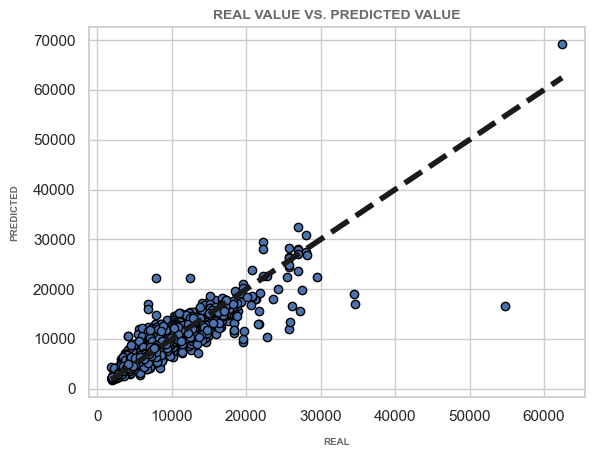

In [662]:
# Plot
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred2, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--", lw=4)
plt.title(
    "REAL VALUE VS. PREDICTED VALUE", fontsize=10, color="dimgrey", fontweight="bold"
)
plt.xlabel("REAL", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.ylabel("PREDICTED", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.show()

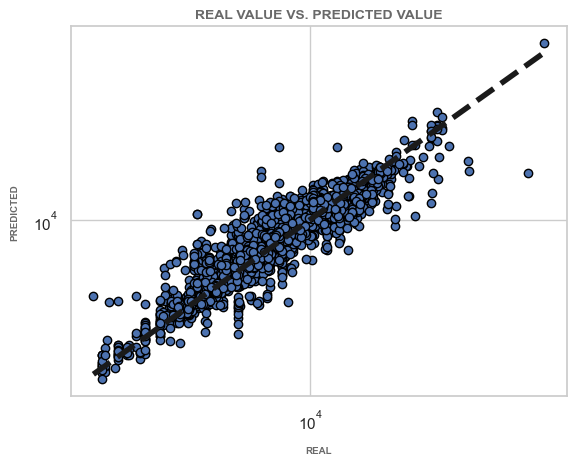

In [663]:
# Plot
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred2, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--", lw=4)
plt.yscale("log")
plt.xscale("log")
plt.title(
    "REAL VALUE VS. PREDICTED VALUE", fontsize=10, color="dimgrey", fontweight="bold"
)
plt.xlabel("REAL", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.ylabel("PREDICTED", color="dimgrey", labelpad=10, fontweight="bold", fontsize=7)
plt.show()

In [664]:
# Absolute Difference between Y_test and Y_pred

dif = pd.DataFrame(
    {
        "Y_test": Y_test,
        "Y_pred": Y_pred2,
        "Absolute Difference": (Y_test - Y_pred2).abs().round(2),
    }
)
dif.head(15)

,Y_test,Y_pred,Absolute Difference
3170,7832,7741.210938,90.79
7574,14441,13383.009766,1057.99
5644,13502,13396.895508,105.10
2614,3841,4044.295410,203.30
10213,12102,12002.155273,99.84
5264,5298,4996.043945,301.96
1456,14815,16384.185547,1569.19
3416,10152,13279.560547,3127.56
5933,10441,9029.070312,1411.93
1499,3383,4234.704590,851.70


Save and Dump the model 


In [665]:
import joblib

# Save the trained model using joblib
model_filename = "xgbr2_model.joblib"
joblib.dump(xgbr2, model_filename)

print("Model saved as", model_filename)

Model saved as xgbr2_model.joblib
